In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
from tqdm import tqdm

Álgebra lineal problema 17


In [2]:
x = sym.Symbol('x', real=True)
y = sym.Symbol('y', real=True)
z = x + sym.I*y

In [3]:
def f(z):
    return z**3 - 1

In [4]:
F = [sym.re(f(z)), sym.im(f(z))]

In [5]:
def Jacobian (F):
    return sym.Matrix( [[sym.diff(F[0], x), sym.diff(F[0], y)], [sym.diff(F[1], x), sym.diff(F[1], y)]] )

J = Jacobian(F)
J

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [6]:
Fn = sym.lambdify([x, y], F, 'numpy')
Jn = sym.lambdify([x, y], J, 'numpy')

In [7]:
def rootsNR (z0, Fn, Jn):
    zn = z0
    for i in range(20):
        x2 = ((zn - np.dot( np.linalg.inv(Jn(zn[0], zn[1])), Fn(zn[0], zn[1]) ) + zn)[0])**2
        y2 = ((zn - np.dot( np.linalg.inv(Jn(zn[0], zn[1])), Fn(zn[0], zn[1]) ) + zn)[1])**2
        norm = np.sqrt(x2+y2)
        
        if np.absolute(norm) < 1e-7:
            break
        
        zn = zn - np.dot( np.linalg.inv(Jn(zn[0], zn[1])), Fn(zn[0], zn[1]) )
        
    return np.array([zn[0],zn[1]])

In [8]:
z0 = np.array([0.5, 0.5])
rootsNR(z0, Fn, Jn )

array([-0.5      ,  0.8660254])

In [9]:
N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

In [10]:
Fractal = np.zeros((N,N), np.int64)
for i in tqdm(range(N)):
    for j in range(N):
        if round((rootsNR((x[i], y[j]), Fn, Jn))[0], 0)==1 and  round((rootsNR((x[i], y[j]), Fn, Jn))[1], 3)==0:
            Fractal[i][j] = 225
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)==-0.5 and round((rootsNR((x[i], y[j]), Fn, Jn))[1], 3)==-0.866:
            Fractal[i][j] = 100
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)==-0.5 and round((rootsNR((x[i], y[j]), Fn, Jn))[1], 3)==0.866:
            Fractal[i][j] = 20


100%|█████████████████████████████████████████| 300/300 [04:56<00:00,  1.01it/s]


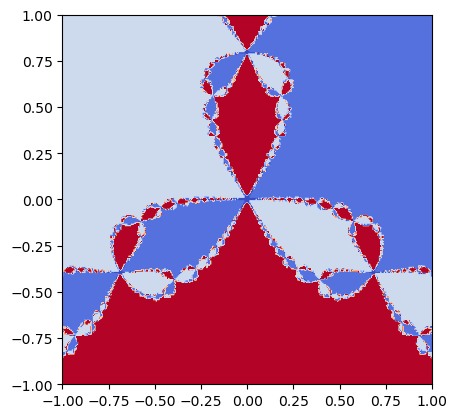

In [11]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])

In [18]:
x = sym.Symbol('x', real=True)
y = sym.Symbol('y', real=True)
z = x + sym.I*y

def f(z):
    return z**5 + 4*x**2 - 1

F = [sym.re(f(z)), sym.im(f(z))]

def Jacobian (F):
    return sym.Matrix( [[sym.diff(F[0], x), sym.diff(F[0], y)], [sym.diff(F[1], x), sym.diff(F[1], y)]] )

J = Jacobian(F)
J

Matrix([
[5*x**4 - 30*x**2*y**2 + 8*x + 5*y**4,         -20*x**3*y + 20*x*y**3],
[               20*x**3*y - 20*x*y**3, 5*x**4 - 30*x**2*y**2 + 5*y**4]])

In [19]:
Fn = sym.lambdify([x, y], F, 'numpy')
Jn = sym.lambdify([x, y], J, 'numpy')

N = 300
x = np.linspace(-0.5, 0.5, N)
y = np.linspace(-0.5, 0.5, N)

In [20]:
Fractal = np.zeros((N,N), np.int64)

for i in tqdm(range(N)):
    for j in range(N):
        if round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)== -1.5 and  round((rootsNR((x[i], y[j]), Fn, Jn))[1], 0)==0:
            Fractal[i][j] = 225
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)== -0.5 and  round((rootsNR((x[i], y[j]), Fn, Jn))[1], 0)==0:
            Fractal[i][j] = 300
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)== 0.5 and  round((rootsNR((x[i], y[j]), Fn, Jn))[1], 0)==0:
            Fractal[i][j] = 425
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)== 0.8 and round((rootsNR((x[i], y[j]), Fn, Jn))[1], 1)==-1.4:
            Fractal[i][j] = 100
        elif round((rootsNR((x[i], y[j]), Fn, Jn))[0], 1)== 0.8 and round((rootsNR((x[i], y[j]), Fn, Jn))[1], 1)==1.4:
            Fractal[i][j] = 20

100%|█████████████████████████████████████████| 300/300 [06:42<00:00,  1.34s/it]


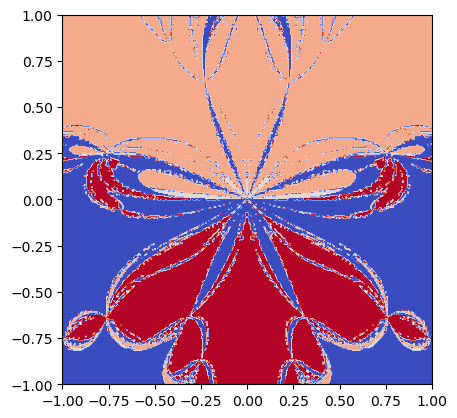

In [15]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])